<a href="https://colab.research.google.com/github/AftabUdaipurwala/PythonBasics/blob/main/Pandas_Time_Series_Analysis_7_Shifting_and_Lagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Section

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
# Mounting the drive for loading the data
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/py-master/pandas/20_shift_lag'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fb.csv	pandas_shift_lag.ipynb	shift_image.png


In [6]:
# reading  data in the file
df = pd.read_csv('/content/drive/MyDrive/py-master/pandas/20_shift_lag/fb.csv', header = 0, parse_dates= ['Date'], index_col=['Date'])
df.head(3)

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91


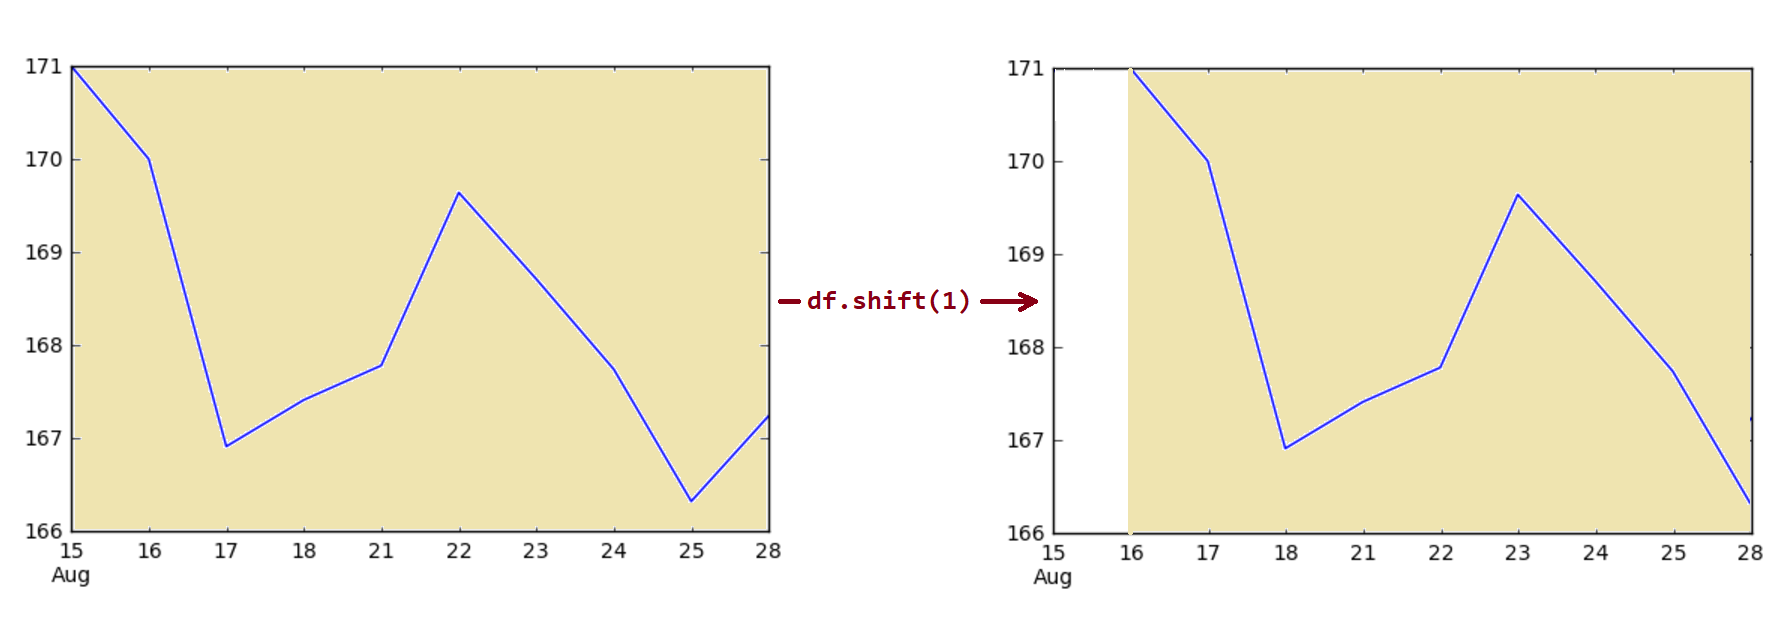

# Shifting values 

In [8]:
df.shift(1)

,Price
Date,
2017-08-15,NaN
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74


In [10]:
df.shift(5)

,Price
Date,
2017-08-15,NaN
2017-08-16,NaN
2017-08-17,NaN
2017-08-18,NaN
2017-08-21,NaN
2017-08-22,171.00
2017-08-23,170.00
2017-08-24,166.91
2017-08-25,167.41


# shifting from bottom

In [11]:
df.shift(-1)

,Price
Date,
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24


# Creating new previous day price column

In [12]:
df['Prev Day Price'] = df['Price'].shift(1)
df

,Price,Prev Day Price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41
2017-08-22,169.64,167.78
2017-08-23,168.71,169.64
2017-08-24,167.74,168.71
2017-08-25,166.32,167.74


In [13]:
df['Price Change'] = df['Price'] - df['Prev Day Price']
df

,Price,Prev Day Price,Price Change
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,-1.00
2017-08-17,166.91,170.00,-3.09
2017-08-18,167.41,166.91,0.50
2017-08-21,167.78,167.41,0.37
2017-08-22,169.64,167.78,1.86
2017-08-23,168.71,169.64,-0.93
2017-08-24,167.74,168.71,-0.97
2017-08-25,166.32,167.74,-1.42


In [14]:
df['5 day return'] =  (df['Price'] - df['Price'].shift(5))*100/df['Price'].shift(5)
df  

,Price,Prev Day Price,Price Change,5 day return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096


In [15]:
df = df[['Price']]
df # clearning up the dataset for reuse

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


# Shifting time instead of values

In [16]:
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [17]:
# change frequency from the None type to business day time
df.index = pd.date_range(start='2017-08-15',periods=10, freq='B')
df

,Price
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32
2017-08-28,167.24


In [18]:
df.index # getting the index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', freq='B')

In [19]:
df.tshift(1)  # Shifting one day ahead

,Price
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74
2017-08-28,166.32
2017-08-29,167.24


In [21]:
# going in reverse
df.tshift(-5) # See saturday sundays are taken care of as its already considered in business time frequency

,Price
2017-08-08,171.00
2017-08-09,170.00
2017-08-10,166.91
2017-08-11,167.41
2017-08-14,167.78
2017-08-15,169.64
2017-08-16,168.71
2017-08-17,167.74
2017-08-18,166.32
2017-08-21,167.24
